# Coronavirus tweets NLP_CLASSIFICATION

The objective of this task is to detect sentimaents in tweets. For the sake of simplicity, we say a tweet contains sentiments which is classified as Negative,Positive ,Extremely Positive ,Extremely Negative and Neutral. So, the task is to classify the tweets according to them.

### STEPS INVOLVED

#### 1.Importing dependencies
#### 2.Exploratory data Analysis (Text and Sentiment)
#### 3.Preprocessing and cleaning text data
#### 4.Tokenisation and  lemmatisation 
#### 5.Feature Extraction
#### 6.Dividing data into training and test data sets
#### 7.Model Building
#### 8.Evaluation of Model
#### 9.Model Testing System

## IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
import nltk
import string
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# changing the directory
os.chdir("D:\\NLP")

In [3]:
# importing the csv file
df1=pd.read_csv("Corona_NLP1.csv",encoding='latin1')
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# importing second file
df2=pd.read_csv("Corona_NLP2.csv",encoding='latin1')
df2.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
print(df1.shape)
print(df2.shape)

(41157, 6)
(3798, 6)


In [6]:
# Merging two csv files
df=pd.concat([df1, df2])
print(df.shape)
df.head()

(44955, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [8]:
# Dropping the other columns i.e UserName,ScreenName,Location,TweetAT as they are not useful
df.drop(columns=['UserName','ScreenName','Location','TweetAt'],inplace=True)
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
# Checking Null values in data
df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

## EXPLORATORY DATA ANALYSIS

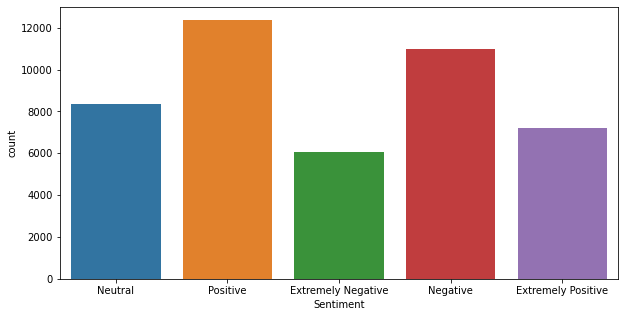

In [10]:
# Plotting the distribution of column Sentiment
plt.figure(figsize=(10,5))
sns.countplot(x=df['Sentiment'])
plt.show()

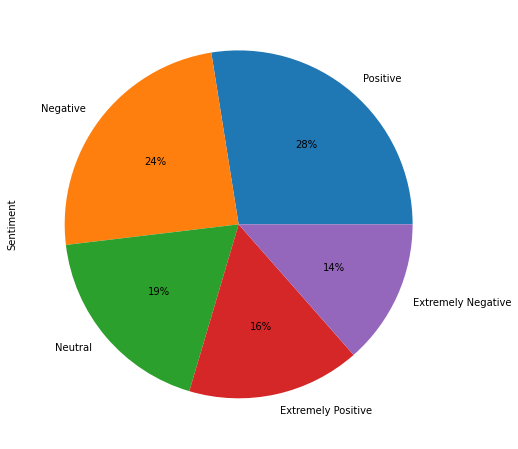

In [11]:
plt.figure(figsize=(8,8))
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [12]:
# Length of each text in Sentiment Column
df['OriginalTweet'].str.len()

0       111
1       237
2       131
3       306
4       310
       ... 
3793    127
3794    213
3795    185
3796    174
3797    254
Name: OriginalTweet, Length: 44955, dtype: int64

In [13]:
count_lettr=df['OriginalTweet'].str.len() - df['OriginalTweet'].str.count(' ')
count_lettr.describe()

count    44955.000000
mean       175.495785
std         58.897960
min          3.000000
25%        130.000000
50%        184.000000
75%        223.000000
max        327.000000
Name: OriginalTweet, dtype: float64

<AxesSubplot:>

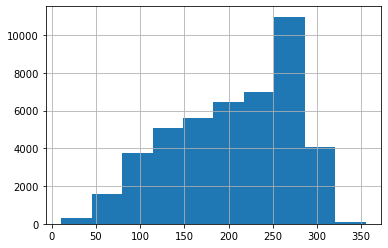

In [14]:
# Distribution of length of Sentiment Column (With considering spaces)
df['OriginalTweet'].str.len().hist()

<AxesSubplot:>

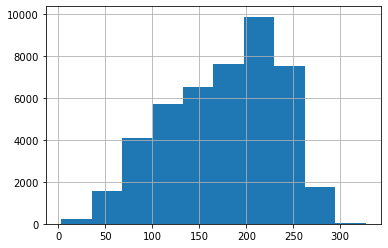

In [15]:
# Distribution of length of Sentiment Column (Without considering spaces)
count_lettr.hist()

## PREPROCESSING AND CLEANING TEXT DATA

In [16]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"", input_txt)
    return input_txt 

# removing the URL
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

# removing the punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text

# removing ASCII characters
def encoded(data):
    encoded_string = data.encode("ascii", "ignore")
    return encoded_string.decode()

# removing irrelevant characters
def reg(data):
    regex = re.compile(r'[\r\n\r\n]')
    return re.sub(regex, '', data)

#removing multi spaces
def spaces(data):
    res = re.sub(' +', ' ',data)
    return res

# removing emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

df['clean_t']=np.vectorize(remove_pattern)(df['OriginalTweet'],'@[\w]*') #takes nested sequence of objects or numpy ararys

df["clean_t"]=df["clean_t"].apply(remove_URL)
df['clean_t'] = df['clean_t'].apply(remove_punctuations)
df['clean_t'] = df['clean_t'].apply(encoded)
df['clean_t'] = df['clean_t'].str.replace("[^a-zA-Z]", " ")    # removing the numeric characters
df["clean_t"]=df["clean_t"].str.lower()                        # to convert into lower case
df['clean_t'] = df['clean_t'].apply(reg) 
df['clean_t']=df['clean_t'].apply(spaces)
df['clean_t'] = df['clean_t'].apply(remove_emojis)

df.head(10)

,OriginalTweet,Sentiment,clean_t
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...
5,As news of the regionÂs first confirmed COVID...,Positive,as news of the regions first confirmed covid c...
6,Cashier at grocery store was sharing his insig...,Positive,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,was at the supermarket today didn t buy toilet...
8,Due to COVID-19 our retail store and classroom...,Positive,due to covid our retail store and classroom in...
9,"For corona prevention,we should stop to buy th...",Negative,for corona prevention we should stop to buy th...


In [17]:
# Removing Short words having length more than 3
df['clean_t'] = df['clean_t'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(10)

,OriginalTweet,Sentiment,clean_t
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,food stock only which empty please panic there...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during covid outbreak becaus...
5,As news of the regionÂs first confirmed COVID...,Positive,news regions first confirmed covid case came s...
6,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid p...
7,Was at the supermarket today. Didn't buy toile...,Neutral,supermarket today didn toilet paper rebel toil...
8,Due to COVID-19 our retail store and classroom...,Positive,covid retail store classroom atlanta will open...
9,"For corona prevention,we should stop to buy th...",Negative,corona prevention should stop things with cash...


In [18]:
# Removing irrelevant words in clean_t column
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

df['clean_t'] = df['clean_t'].apply(clean_sent)

In [19]:
df.head(10)

,OriginalTweet,Sentiment,clean_t
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,advice Talk to your neighbours family to excha...,Positive,advice talk your family exchange phone create ...
2,Coronavirus Australia: Woolworths to give elde...,Positive,give elderly disabled shopping amid covid outb...
3,My food stock is not the only one which is emp...,Positive,food stock only which empty please panic there...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during covid outbreak becaus...
5,As news of the regionÂs first confirmed COVID...,Positive,news first confirmed covid case came county la...
6,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store covid prove credibility ...
7,Was at the supermarket today. Didn't buy toile...,Neutral,supermarket today toilet paper rebel covid
8,Due to COVID-19 our retail store and classroom...,Positive,covid retail store classroom will open walk bu...
9,"For corona prevention,we should stop to buy th...",Negative,corona prevention should stop with cash should...


# Tokenisation

In [20]:
# Converting text into Tokens
from nltk.tokenize import word_tokenize
df['clean_t'] = df['clean_t'].apply(lambda x: nltk.word_tokenize(x))

In [21]:
# Removing Stop Words
from nltk.corpus import stopwords
s = set(stopwords.words('english'))
# Removing Stopwords
def remove_stopwords(data):
    txt_clean=[w for w in data if w not in s]
    return txt_clean
df['clean_t']=df['clean_t'].apply(lambda x : remove_stopwords(x))
df['clean_t'].head(10)

0                                                   []
1    [advice, talk, family, exchange, phone, create...
2    [give, elderly, disabled, shopping, amid, covi...
3    [food, stock, empty, please, panic, enough, fo...
4    [ready, supermarket, covid, outbreak, paranoid...
5    [news, first, confirmed, covid, case, came, co...
6    [cashier, grocery, store, covid, prove, credib...
7    [supermarket, today, toilet, paper, rebel, covid]
8    [covid, retail, store, classroom, open, walk, ...
9    [corona, prevention, stop, cash, payment, coro...
Name: clean_t, dtype: object

In [22]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df['clean_t']= df['clean_t'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()

,OriginalTweet,Sentiment,clean_t
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[]
1,advice Talk to your neighbours family to excha...,Positive,"[advic, talk, famili, exchang, phone, creat, c..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[give, elderli, disabl, shop, amid, covid, out..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, empti, pleas, panic, enough, foo..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[readi, supermarket, covid, outbreak, paranoid..."


In [23]:
# lemmatizing
'''from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['clean_t'] = df['clean_t'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head(10)'''

"from nltk.stem import WordNetLemmatizer\nlemmatizer = WordNetLemmatizer()\ndf['clean_t'] = df['clean_t'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])\ndf.head(10)"

In [24]:
df['clean_t'].head(50)

0                                                    []
1     [advic, talk, famili, exchang, phone, creat, c...
2     [give, elderli, disabl, shop, amid, covid, out...
3     [food, stock, empti, pleas, panic, enough, foo...
4     [readi, supermarket, covid, outbreak, paranoid...
5     [news, first, confirm, covid, case, came, coun...
6     [cashier, groceri, store, covid, prove, credib...
7     [supermarket, today, toilet, paper, rebel, covid]
8     [covid, retail, store, classroom, open, walk, ...
9     [corona, prevent, stop, cash, payment, corona,...
10    [month, howev, reduc, everyon, entranc, depend...
11    [covid, situat, demand, food, wait, time, long...
12    [commun, look, less, capabl, villag, ensur, st...
13             [need, stock, food, deliv, whatev, need]
14    [covid, resourc, center, travel, help, travel,...
15    [groceri, store, unpredict, eat, safe, altern,...
16                                                   []
17    [russia, consum, surveil, watchdog, case, 

In [25]:
# Converting Extremely Negative and Extremely Positive to Negative Nand Positive
df.loc[df['Sentiment']=="Extremely Positive", 'Sentiment'] = "Positive"
df.loc[df['Sentiment']=="Extremely Negative", 'Sentiment'] = "Negative"
df.head()

,OriginalTweet,Sentiment,clean_t
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[]
1,advice Talk to your neighbours family to excha...,Positive,"[advic, talk, famili, exchang, phone, creat, c..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[give, elderli, disabl, shop, amid, covid, out..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, empti, pleas, panic, enough, foo..."
4,"Me, ready to go at supermarket during the #COV...",Negative,"[readi, supermarket, covid, outbreak, paranoid..."


# WORD CLOUD

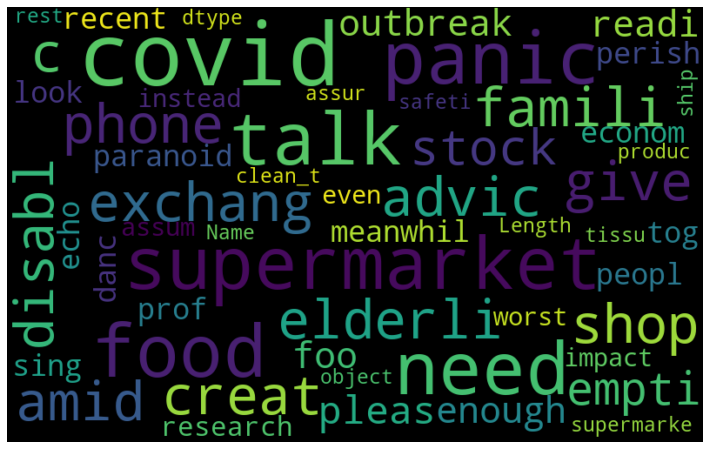

In [26]:

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,background_color='black').generate(str(df['clean_t']))
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [28]:
# Wordcloud based on Sentiments
df_neutral=df[df.Sentiment == "Neutral"]
df_Positve=df[df.Sentiment == "Positive"]
df_Negative=df[df.Sentiment == 'Negative']

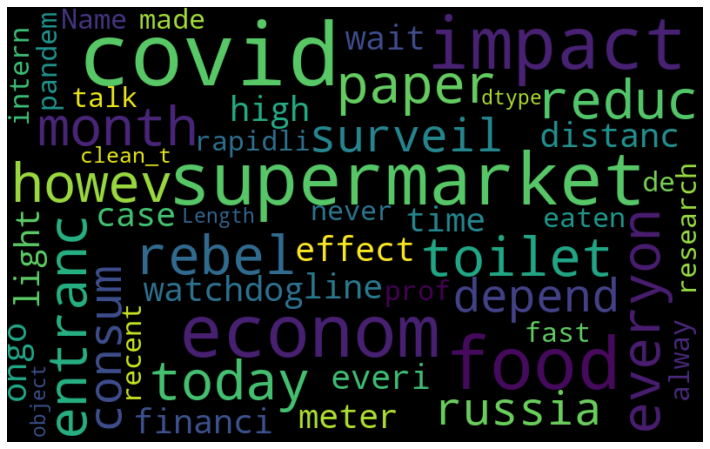

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(str(df_neutral['clean_t']))
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

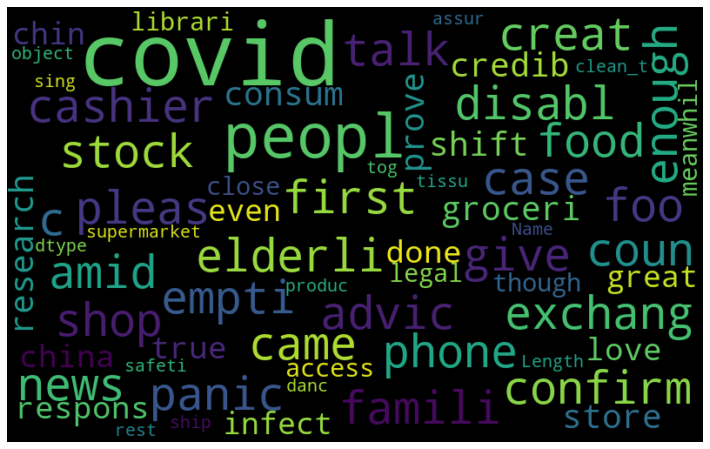

In [30]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(str(df_Positve['clean_t']))
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

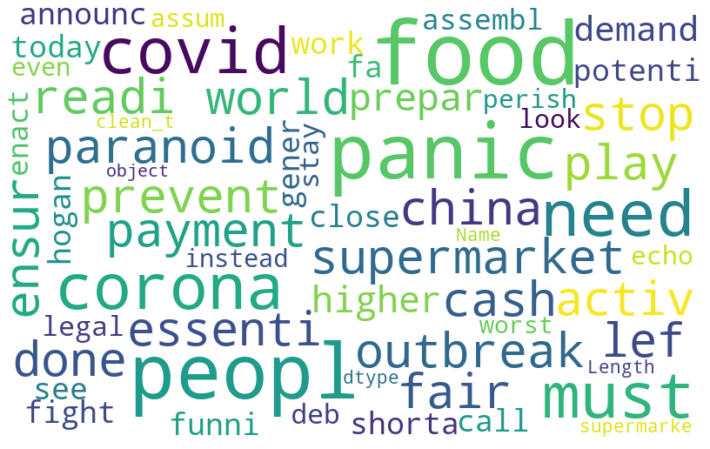

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,background_color='white', random_state=42, max_font_size=100).generate(str(df_Negative['clean_t']))
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

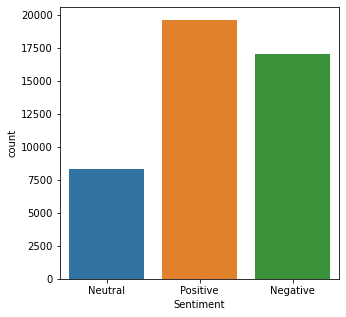

In [32]:
# Plotting the distribution of column Sentiment
plt.figure(figsize=(5,5))
sns.countplot(x=df['Sentiment'])
plt.show()

In [33]:
# Converting Categorical values into Numerical Vaues
dict = {'Positive' : 1, 'Negative' : -1 , 'Neutral' : 0}
  
# Print the dictionary
print(dict)
  
# Remap the values of the dataframe
df.replace({"Sentiment": dict},inplace=True)

{'Positive': 1, 'Negative': -1, 'Neutral': 0}


## Dividing Data into Training and Test Sets

In [34]:
x=df['clean_t']
y=df['Sentiment']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3,stratify=y)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31468,)
(31468,)
(13487,)
(13487,)


In [37]:
x_train = pd.DataFrame(x_train)
type(x_train)
x_test = pd.DataFrame(x_test)
type(x_test)

pandas.core.frame.DataFrame

# Feature extraction

In [38]:
# Using Bag of Words Technique we are going to convert text into numeric form
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(lowercase=False)
x_train['clean_t']=x_train['clean_t'].apply(str)
bow1 = bow_vec.fit_transform(x_train['clean_t'])

In [39]:
x_test['clean_t']=x_test['clean_t'].apply(str)
bow2=bow_vec.transform(x_test['clean_t'])

In [40]:
x_test=pd.DataFrame(bow2.toarray())
x_test

,0,1,2,3,4,5,6,7,8,9,...,8651,8652,8653,8654,8655,8656,8657,8658,8659,8660
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
x_train=pd.DataFrame(bow1.toarray())
x_train

,0,1,2,3,4,5,6,7,8,9,...,8651,8652,8653,8654,8655,8656,8657,8658,8659,8660
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31465,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
31466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

We build model by using Bag of words and TD-IDF techiniques
Here we are building 4 models ,Computing accuracies of these all models we will select best accuracy model
1.Random Forest Classifier
2.Decision TreeClassifer
3.Logistic Regression
4.Naive_bayes 

## Model Buidling Using Bag of Words Technique

### 1.Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train, y_train)

RandomForestClassifier()

### 2.Decision Tree Classifier

In [43]:
model2= DecisionTreeClassifier()
model2.fit(x_train, y_train)

DecisionTreeClassifier()

### 3.Logistic Regression

In [44]:
model3=LogisticRegression( )
model3.fit(x_train, y_train)

LogisticRegression()

## Model Testing

In [45]:
# testing
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

In [46]:
# Model Evaluation
print("---------------------------Model 1(RFC)--------------------")
print(classification_report(y_test, pred1))
print("---------------------------Model 2(DTC)--------------------")
print(classification_report(y_test, pred2))
print("---------------------------Model 3(LR)--------------------")
print(classification_report(y_test, pred3))

---------------------------Model 1(RFC)--------------------
              precision    recall  f1-score   support

          -1       0.76      0.70      0.73      5109
           0       0.64      0.70      0.67      2500
           1       0.78      0.80      0.79      5878

    accuracy                           0.74     13487
   macro avg       0.73      0.73      0.73     13487
weighted avg       0.75      0.74      0.74     13487

---------------------------Model 2(DTC)--------------------
              precision    recall  f1-score   support

          -1       0.66      0.64      0.65      5109
           0       0.58      0.60      0.59      2500
           1       0.71      0.72      0.72      5878

    accuracy                           0.67     13487
   macro avg       0.65      0.65      0.65     13487
weighted avg       0.67      0.67      0.67     13487

---------------------------Model 3(LR)--------------------
              precision    recall  f1-score   support

    

We can see that model3 i.e Logistic Regression has performed well

## Model Buidling Using TF-IDF Technique

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False)
df['clean_t']=df['clean_t'].apply(str)
tfid = vectorizer.fit_transform(df['clean_t'])
tfid

<44955x9672 sparse matrix of type '<class 'numpy.float64'>'
	with 461614 stored elements in Compressed Sparse Row format>

### Dividing Data into Training and Test data sets

In [48]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(tfid,df['Sentiment'],random_state=42, test_size=0.3,stratify=df['Sentiment'])

## Random Forest Classifier

In [49]:
model4=RandomForestClassifier()
model4.fit(x_train1, y_train1)

RandomForestClassifier()

## Decision Tree Classifier`

In [50]:
model5= DecisionTreeClassifier()
model5.fit(x_train1, y_train1)

DecisionTreeClassifier()

## Logistic Regression

In [51]:
model6=LogisticRegression()
model6.fit(x_train1, y_train1)

LogisticRegression()

In [52]:
pred4= model4.predict(x_test1)
pred5= model5.predict(x_test1)
pred6= model6.predict(x_test1)

In [53]:
print("---------------------------Model 1(RFC)--------------------")
print(classification_report(y_test1, pred4))
print("---------------------------Model 2(DTC)--------------------")
print(classification_report(y_test1, pred5))
print("---------------------------Model 3(LR)--------------------")
print(classification_report(y_test1, pred6))

---------------------------Model 1(RFC)--------------------
              precision    recall  f1-score   support

          -1       0.73      0.69      0.71      5109
           0       0.64      0.61      0.63      2500
           1       0.74      0.79      0.77      5878

    accuracy                           0.72     13487
   macro avg       0.71      0.70      0.70     13487
weighted avg       0.72      0.72      0.72     13487

---------------------------Model 2(DTC)--------------------
              precision    recall  f1-score   support

          -1       0.61      0.58      0.59      5109
           0       0.49      0.54      0.52      2500
           1       0.67      0.67      0.67      5878

    accuracy                           0.61     13487
   macro avg       0.59      0.60      0.59     13487
weighted avg       0.61      0.61      0.61     13487

---------------------------Model 3(LR)--------------------
              precision    recall  f1-score   support

    

# Model Testing

In [54]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,pred3)
s=accuracy_score(y_test,pred3)
print("Accuracy Score of model3 by using Bag of words",round(s*100,2))

Accuracy Score of model3 by using Bag of words 76.5


## Saving the Model and vectorizer

In [55]:
import pickle
pickle.dump(model3,open('model.pkl',"wb"))
pickle.dump(bow_vec,open('bow.pkl',"wb"))

In [56]:
# Defining Function
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"", input_txt)
    return input_txt

# removing the punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text

# removing ASCII characters
def encoded(data):
    encoded_string = data.encode("ascii", "ignore")
    return encoded_string.decode()

# removing irrelevant characters
def reg(data):
    regex = re.compile(r'[\r\n\r\n]')
    return re.sub(regex, '', data)

#removing multi spaces
def spaces(data):
    res = re.sub(' +', ' ',data)
    return res

# removing emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

# Removing irrelevant words in clean_t column
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

# Removing Stopwords
s = set(stopwords.words('english'))
def remove_stopwords(data):
    txt_clean= [w for w in data if w not in s]
    return txt_clean


def predict(input_text):
    data_frame=pd.DataFrame([input_text],columns=['text'])
    data_frame['text'] = data_frame['text'].apply(str)
    data_frame['text'] = np.vectorize(remove_pattern)(data_frame['text'],'@[\w]*')
    data_frame['text'] = data_frame["text"].apply(remove_URL)
    data_frame['text'] = data_frame['text'].apply(remove_punctuations)
    data_frame['text'] = data_frame['text'].str.replace("[^a-zA-Z]", " ")    # removing the numeric characters
    data_frame['text'] = data_frame['text'].str.lower()                        # to convert into lower case
    data_frame['text'] = data_frame['text'].apply(reg) 
    data_frame['text'] = data_frame['text'].apply(spaces)
    data_frame['text'] = data_frame['text'].apply(remove_emojis)
    data_frame['text'] = data_frame['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
    data_frame['text'] = data_frame['text'].apply(clean_sent)
    data_frame['text'] = data_frame['text'].apply(lambda x: nltk.word_tokenize(x))
    data_frame['text'] = data_frame['text'].apply(lambda x: remove_stopwords(x))
    data_frame['text']= data_frame['text'].apply(lambda x: [stemmer.stem(word) for word in x])
    data_frame['text'] = data_frame['text'].apply(str)
    bow1 = bow_vec.transform(data_frame['text'])
    final = pd.DataFrame(bow1.toarray())
    my_prediction = model3.predict(final)
    if my_prediction == 0 :
        print("Neutral")
    elif my_prediction== -1:
        print("Negative")
    else:
        print("Positive")
     

In [57]:
predict("hate")

Negative
